# Identify the Largest Recoverable Angular Scale of SCUBA2

Import packages

In [1]:
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
from astropy import units as u
import aplpy
%matplotlib inline

Use Oph L1688 Herschel 250 um map as model image.
L1688 is located at ∼135 pc. Herschel 250 um map's resolution is 18" and pixel size is 6".

Plot model image, the source is about 3 deg * 3 deg

INFO: Auto-setting vmin to -9.325e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.035e+03 [aplpy.core]
INFO: Auto-setting vmin to  0.000e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.325e+02 [aplpy.core]


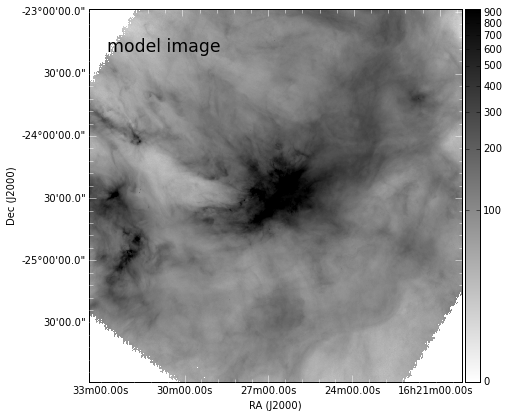

In [32]:
#define input and output file name, and import model map
N_file='/Users/shjiao/desktop/Ophiuchus/spire250.fits'
f_model = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/spire250.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_model.add_label(0.2,0.9, 'model image', color='black', relative=True, size='xx-large',layer='source')
f_model.show_grayscale()
f_model.add_colorbar()
f_model.colorbar.show()
f_model.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_model.recenter(246.6879631142824,-24.48757996761378,width=3.,height=3.)

Scale the model map to a further distance, to mimic the observations at lower angular resolution.
I scale the model map to 1350 pc and have a resolution of 1.8" and pixel size of 0.6".
And also for using as the fakemap, I scale the flux of model image and move it to the same place of the blank image.

Plot scaled image, the source is about 0.3 deg * 0.3 deg

INFO: Auto-setting vmin to -1.119e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.242e-02 [aplpy.core]
INFO: Auto-setting vmin to  0.000e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.119e-02 [aplpy.core]


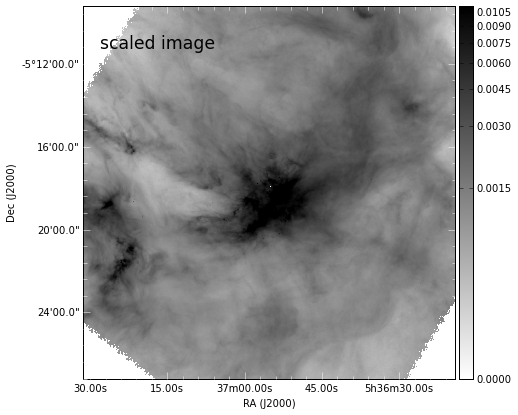

In [31]:
#define input and output file name, and import model map
N_file='/Users/shjiao/desktop/Ophiuchus/spire250.scale.fits'
f_scaled = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/spire250.scale.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_scaled.add_label(0.2,0.9, 'scaled image', color='black', relative=True, size='xx-large',layer='source')
f_scaled.show_grayscale()
f_scaled.add_colorbar()
f_scaled.colorbar.show()
f_scaled.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_scaled.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

Plot the simulated SCUBA2 observation

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -1.913e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.191e-02 [aplpy.core]
INFO: Auto-setting vmin to -7.706e-04 [aplpy.core]
INFO: Auto-setting vmax to  1.066e-02 [aplpy.core]


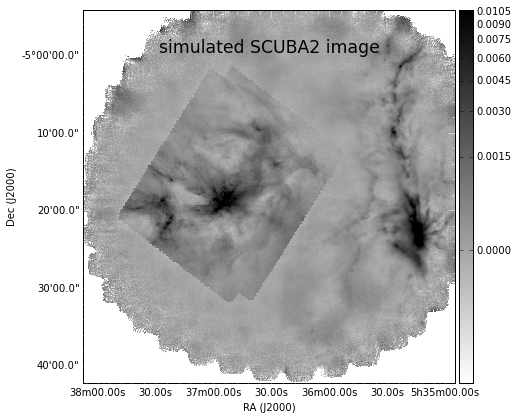

In [33]:
#define input and output file name, and import model map
N_file='/Users/shjiao/desktop/blank850_fake.fits'
f_model = aplpy.FITSFigure('/Users/shjiao/desktop/blank850_fake.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_model.add_label(0.5,0.9, 'simulated SCUBA2 image', color='black', relative=True, size='xx-large',layer='source')
f_model.show_grayscale()
f_model.add_colorbar()
f_model.colorbar.show()
f_model.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_model.recenter(84.1304166666667,-5.3035555555555,width=0.8,height=0.8)

Regrid the simulated SCUBA2 image to have the same pixel size of the scaled map for comparing it with our scaled model map.

Plot the re-grided simulated SCUBA2 observation

INFO: Auto-setting vmin to -1.273e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.109e-02 [aplpy.core]
INFO: Auto-setting vmin to -2.509e-04 [aplpy.core]
INFO: Auto-setting vmax to  9.970e-03 [aplpy.core]


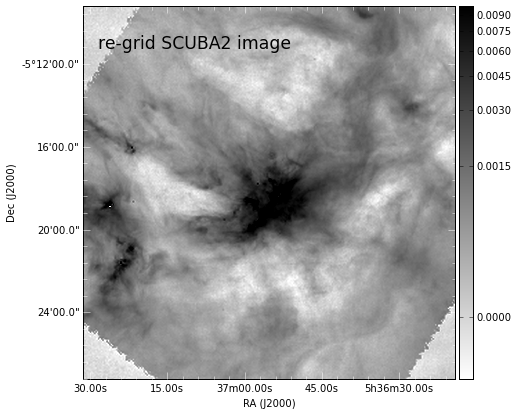

In [34]:
#define input and output file name, and import model map
N_file='/Users/shjiao/desktop/Ophiuchus/regrid/blank850_fake.regrid.fits'
f_model = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/regrid/blank850_fake.regrid.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_model.add_label(0.3,0.9, 're-grid SCUBA2 image', color='black', relative=True, size='xx-large',layer='source')
f_model.show_grayscale()
f_model.add_colorbar()
f_model.colorbar.show()
f_model.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_model.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)